Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

In [71]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, ttest_1samp
from sklearn.linear_model import LinearRegression

from contrastive.utils.models_database import import_bdd

In [72]:
database_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_gridsearch-HCP-half-2_evaluation-ACCpatterns-1.csv"
save_fig_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Article/figures"

## Use the testing database

In [73]:
bdd = pd.read_csv(database_path, index_col=0)
print(len(bdd))
bdd.groupby(['num_representation_features','backbone_name', 'foldlabel']).count()

83


model_path  auc  auc_std  \
num_representation_features backbone_name foldlabel                             
4                           convnet       False               5    5        5   
                                          True                5    5        5   
                            densenet      False               5    5        5   
                                          True                5    5        5   
                            pointnet      False               1    1        1   
                                          True                5    5        5   
10                          convnet       False               5    5        5   
                                          True                5    5        5   
                            densenet      False               5    5        5   
                                          True                5    5        5   
                            pointnet      False               2    2        2   
                                          True                5    5        5   
30                          convnet       False               5    5        5   
                                          True                5    5        5   
                            densenet      False               5    5        5   
                                          True               10   10       10   
                            pointnet      True                5    5        5   

                                                     accuracy  accuracy_std  \
num_representation_features backbone_name foldlabel                           
4                           convnet       False             5             5   
                                          True              5             5   
                            densenet      False             5             5   
                                          True              5             5   
                            pointnet      False             1             1   
                                          True              5             5   
10                          convnet       False             5             5   
                                          True              5             5   
                            densenet      False             5             5   
                                          True              5             5   
                            pointnet      False             2             2   
                                          True              5             5   
30                          convnet       False             5             5   
                                          True              5             5   
                            densenet      False             5             5   
                                          True             10            10   
                            pointnet      True              5             5   

                                                     num_outputs  git_branch  
num_representation_features backbone_name foldlabel                           
4                           convnet       False                0           5  
                                          True                 0           5  
                            densenet      False                0           5  
                                          True                 0           5  
                            pointnet      False                0           1  
                                          True                 0           5  
10                          convnet       False                0           5  
                                          True                 5           5  
                            densenet      False                0           5  
                                          True                 0           5  
                            pointnet      False                

In [74]:
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.head()
# clean_bdd = bdd[bdd.exclude == 'False']
# len(bdd)

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,num_outputs,git_branch
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,convnet,True,10,10.0,Run_03_aymeric
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,convnet,True,10,10.0,Run_03_aymeric
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,convnet,True,10,10.0,Run_03_aymeric
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,convnet,True,10,10.0,Run_03_aymeric
11,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.695069,0.002720,0.671836,0.008951,convnet,True,4,NaN,Run_03_aymeric


In [75]:
bdd = import_bdd(database_path, verbose=True)
bdd.sort_values(by='auc', inplace=True)
bdd = bdd[bdd.exclude == 'False']
bdd

path /neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_gridsearch-HCP-half-2_evaluation-ACCpatterns-1.csv
0 have been removed for bad learning


,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,num_outputs,git_branch,exclude
41,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.428457,0.021012,0.558105,0.011970,pointnet,True,30,NaN,pointnet,False
52,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.435405,0.019208,0.543836,0.010865,convnet,False,10,NaN,Run_03_aymeric,False
70,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.445750,0.035221,0.521053,0.018121,densenet,False,30,NaN,Run_03_aymeric,False
74,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.445992,0.052179,0.543041,0.022667,densenet,False,30,NaN,Run_03_aymeric,False
63,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.449684,0.033095,0.561708,0.010936,convnet,False,4,NaN,Run_03_aymeric,False
...,...,...,...,...,...,...,...,...,...,...,...
11,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.695069,0.002720,0.671836,0.008951,convnet,True,4,NaN,Run_03_aymeric,False
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,convnet,True,10,10.0,Run_03_aymeric,False
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,convnet,True,10,10.0,Run_03_aymeric,False
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,convnet,True,10,10.0,Run_03_aymeric,False


In [76]:
len(bdd)

83

In [77]:
# interesting_columns = ["model_path", 'auc', 'auc_std', 'backbone_name', 'batch_size', 'dataset_name', 'drop_rate', 'foldlabel',
#                        'num_representation_features', 'temperature']
# bdd[interesting_columns].iloc[:10,:]

In [78]:
# interesting_columns = ["model_path", 'auc', 'auc_std', 'backbone_name', 'batch_size', 'dataset_name', 'drop_rate', 'foldlabel',
#                        'num_representation_features', 'temperature']
# bdd[interesting_columns].iloc[:10,:]

### Performance histogram

In [79]:
backbones = ['convnet', 'densenet', 'pointnet']
foldlabels = [False, True]
dimensions = [4, 10, 30]

n_bb = len(backbones)
n_fold = len(foldlabels)
n_dims = len(dimensions)

colors = ['r', 'b', 'g']

pca4 = [0.537, 0.097]
pca10 = [0.548, 0.074]
pca30 = [0.587, 0.055]

pca = [pca4[0], pca10[0], pca30[0]]
std_pca = [pca4[1], pca10[1], pca30[1]]

clean_bdd = bdd

In [80]:
len(clean_bdd)

83

In [81]:
def performance_histogram(bdd, main, x, y, filters, colors=['r', 'b', 'g'], extended=True):
    n_x = len(x)
    n_y = len(y)
    
    plt.figure()
    bins = np.arange(0.45, 0.71, step=0.01)

    for i,element in enumerate(main):
        filtered_bdd = bdd[(bdd[filters[0]] == element) & ~(bdd.model_path.str.contains('unfinished'))]
        print(f"{element}, N = {filtered_bdd.shape[0]}, mean performance: {filtered_bdd.auc.mean()}")
        plt.hist(filtered_bdd['auc'].values, bins, color=colors[i], alpha=0.6)
        plt.xlabel('auc')
    
    if main == dimensions:
        ax = plt.gca()
        y_min, y_max = ax.get_ylim()
        plt.vlines(pca4[0], ymin=y_min, ymax=y_max, colors='blue')
        plt.vlines(pca10[0], ymin=y_min, ymax=y_max, colors='red')
        plt.vlines(pca30[0], ymin=y_min, ymax=y_max, colors='green')

    
    if main == foldlabels:
        plt.legend(["no_foldlabel", "foldlabel"])
    elif main == backbones:
        plt.legend(["convnet", "densenet", "pointnet"])
    elif main == dimensions:
        plt.legend(['pca (dim=4)', 'pca (dim=10)', 'pca (dim=30)'] + main, loc='upper left')
    plt.show()

    if extended:
        plt.figure(figsize=(n_y*6.4, n_x*4.8))

        for j in range(n_x):
            for k in range(n_y):
                pre_filtered_bdd = bdd[(bdd[filters[1]] == x[j]) & (bdd[filters[2]] == y[k])]
                print(x[j], y[k])
                plt.subplot(n_x, n_y, k + n_y*j + 1)
                for i,element in enumerate(main):
                    filtered_bdd = pre_filtered_bdd[(pre_filtered_bdd[filters[0]] == element) & ~(pre_filtered_bdd.model_path.str.contains('unfinished'))]
                    print(f"{element}, N = {filtered_bdd.shape[0]}, mean performance: {filtered_bdd.auc.mean()}")
                    plt.hist(filtered_bdd['auc'].values, bins, color=colors[i], alpha=0.6)
                    plt.xlabel('auc')
                    plt.title(str(x[j])+' '+ str(y[k]))
                print()
                plt.legend(main)
        plt.show()

convnet, N = 30, mean performance: 0.6267982667039419
densenet, N = 35, mean performance: 0.5127442789248772
pointnet, N = 18, mean performance: 0.5597258720839933


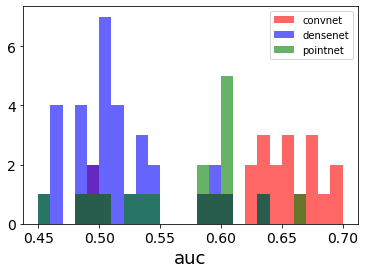

In [82]:
performance_histogram(clean_bdd, backbones, foldlabels, dimensions, filters=['backbone_name', 'foldlabel', 'num_representation_features'],
                      extended=False)

False, N = 33, mean performance: 0.5264124075533078
True, N = 50, mean performance: 0.5890690802348337


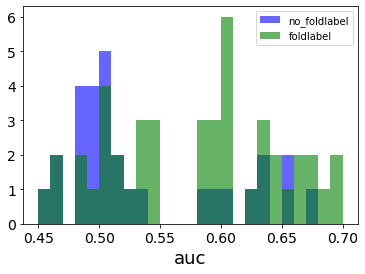

In [83]:
performance_histogram(clean_bdd, foldlabels, dimensions, backbones, filters=['foldlabel', 'num_representation_features', 'backbone_name'],
                      colors=['b', 'g'], extended=False)

4, N = 26, mean performance: 0.544115169566246
10, N = 27, mean performance: 0.5739643918450181
30, N = 30, mean performance: 0.5727010157487652


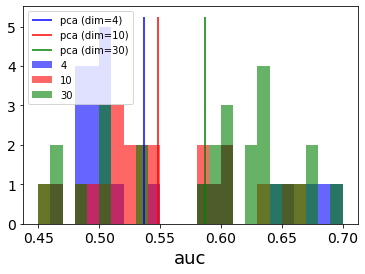

In [84]:
performance_histogram(clean_bdd, dimensions, foldlabels, backbones, filters=['num_representation_features', 'foldlabel', 'backbone_name'],
                      colors=['b', 'r', 'g'], extended=False)

### Results tables

In [85]:
def significance_over_pca(backbone, foldlabel, dim, bdd=clean_bdd):
    filtered_df = bdd[(bdd.backbone_name == backbone) & (bdd.foldlabel == foldlabel) & (bdd.num_representation_features == dim)]
    aucs = filtered_df.auc
    if dim == 4:
        pca = pca4
    elif dim == 10:
        pca = pca10
    elif dim == 30:
        pca = pca30
    else:
        raise ValueError('Not a dimension the PCA is evaluated for')
    
    return ttest_1samp(aucs, pca[0])

In [86]:
idx = ['no foldlabel 4', 'foldlabel 4', 'no_foldlabel_10', 'foldlabel_10', 'no foldlabel 30', 'foldlabel 30']

size_rows = len(dimensions)*len(foldlabels)
df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones)
std_df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones)
count_df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones, dtype=int)
p_values_df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones)

for backbone in backbones:
    i = 0
    for dim in dimensions:
        for foldlabel in foldlabels:
            filtered_bdd = clean_bdd[(clean_bdd.backbone_name == backbone) & (clean_bdd.foldlabel == foldlabel) & (clean_bdd.num_representation_features == dim)]
            df[backbone][i] = filtered_bdd.auc.mean()
            std_df[backbone][i] = filtered_bdd.auc.std()
            count_df[backbone][i] =  filtered_bdd.count()[0]
            p_values_df[backbone][i] = significance_over_pca(backbone, foldlabel, dim, bdd=clean_bdd)[1]
            i+=1

df

/host/volatile/jc225751/Runs/56_miccai2023/Program/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/host/volatile/jc225751/Runs/56_miccai2023/Program/venv/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/host/volatile/jc225751/Runs/56_miccai2023/Program/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/host/volatile/jc225751/Runs/56_miccai2023/Program/venv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/host/volatile/jc225751/Runs/56_miccai2023/Program/venv/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False

,convnet,densenet,pointnet
no foldlabel 4,0.485991,0.500476,0.484360
foldlabel 4,0.668558,0.498226,0.579276
no_foldlabel_10,0.581230,0.508630,0.497478
foldlabel_10,0.729442,0.509088,0.572026
no foldlabel 30,0.639520,0.462611,NaN
foldlabel 30,0.656048,0.555090,0.567848


In [87]:
std_df

,convnet,densenet,pointnet
no foldlabel 4,0.021361,0.004411,NaN
foldlabel 4,0.021536,0.030146,0.047526
no_foldlabel_10,0.086321,0.014909,0.054544
foldlabel_10,0.034376,0.031134,0.037278
no foldlabel 30,0.027657,0.016978,NaN
foldlabel 30,0.028605,0.057430,0.099419


In [88]:
clean_bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,num_outputs,git_branch,exclude
41,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.428457,0.021012,0.558105,0.011970,pointnet,True,30,NaN,pointnet,False
52,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.435405,0.019208,0.543836,0.010865,convnet,False,10,NaN,Run_03_aymeric,False
70,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.445750,0.035221,0.521053,0.018121,densenet,False,30,NaN,Run_03_aymeric,False
74,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.445992,0.052179,0.543041,0.022667,densenet,False,30,NaN,Run_03_aymeric,False
63,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.449684,0.033095,0.561708,0.010936,convnet,False,4,NaN,Run_03_aymeric,False


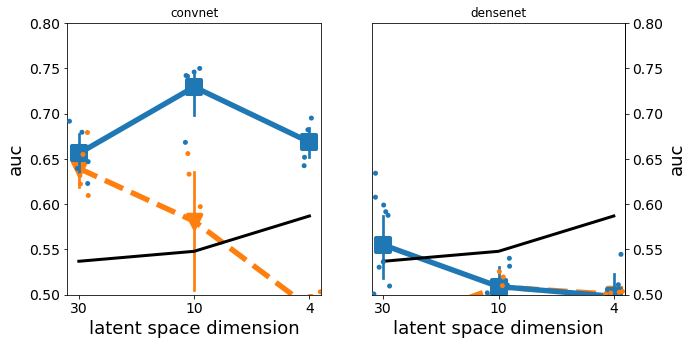

In [89]:
clean_bdd['num_representation_features'] = clean_bdd['num_representation_features'].astype(str)
f, axs = plt.subplots(1, 2, figsize=(10, 5))
index = ['4','10','30']
backbones = ["convnet", "densenet"]
for ax, backbone in zip(axs, backbones):
    sns.pointplot(data=clean_bdd[clean_bdd.backbone_name==backbone], x=clean_bdd.num_representation_features, y="auc", hue = "foldlabel", palette=['C1', 'C0'], markers=['v', 's'], scale=2, linestyles=['--', '-'], ax=ax)
    sns.stripplot(data=clean_bdd[clean_bdd.backbone_name==backbone], x=clean_bdd.num_representation_features, y="auc", hue = "foldlabel", palette=['C1', 'C0'], jitter=.1, ax=ax)
    ax.plot(index, pca, color='black', linewidth=3)
    ax.set_title(backbone)
    ax.set_xlabel("latent space dimension")
    if backbone != "convnet":
        ax.set_ylabel("")
        ax.set_yticks([])
    if backbone == "densenet":
        secax = ax.secondary_yaxis('right')
        secax.set_ylabel('auc')
    ax.legend([],[], frameon=False)
    ax.set_ylim([0.5,0.8])
plt.savefig(save_fig_path + "/testing.svg")

In [90]:
# clean_bdd['num_representation_features'] = clean_bdd['num_representation_features'].astype(str)
# f, ax = plt.subplots(1, 1, figsize=(10, 5))
# index = ['4', '10', '30']
# backbones = ["convnet"]
# for backbone in backbones:
#     sns.pointplot(data=clean_bdd[clean_bdd.backbone_name==backbone & clean_bdd.foldlabel==True],
#                   x=clean_bdd.num_representation_features, y="auc", palette=['C0'], markers=['s'], scale=2, linestyles=['-'], ax=ax)
#     # sns.stripplot(data=clean_bdd[clean_bdd.backbone_name==backbone], x=clean_bdd.num_representation_features, y="auc", hue = "foldlabel", palette=['C1', 'C0'], jitter=.1, ax=ax)
#     ax.plot(index, pca, color='black', linewidth=3)
#     ax.set_title(backbone)
#     ax.set_xlabel("latent space dimension")
#     if backbone != "convnet":
#         ax.set_ylabel("")
#         ax.set_yticks([])
#     if backbone == "densenet":
#         secax = ax.secondary_yaxis('right')
#         secax.set_ylabel('auc')
#     ax.legend([],[], frameon=False)
#     ax.set_ylim([0.5,0.8])
# plt.savefig(save_fig_path + "/testing.svg")

In [91]:
std_df

,convnet,densenet,pointnet
no foldlabel 4,0.021361,0.004411,NaN
foldlabel 4,0.021536,0.030146,0.047526
no_foldlabel_10,0.086321,0.014909,0.054544
foldlabel_10,0.034376,0.031134,0.037278
no foldlabel 30,0.027657,0.016978,NaN
foldlabel 30,0.028605,0.057430,0.099419


In [92]:
count_df

,convnet,densenet,pointnet
no foldlabel 4,5,5,1
foldlabel 4,5,5,5
no_foldlabel_10,5,5,2
foldlabel_10,5,5,5
no foldlabel 30,5,5,0
foldlabel 30,5,10,5


In [93]:
print(pca4[0], pca10[0], pca30[0])
p_values_df

0.537 0.548 0.587


,convnet,densenet,pointnet
no foldlabel 4,0.005927,0.000050,NaN
foldlabel 4,0.000166,0.045191,0.117581
no_foldlabel_10,0.437889,0.004117,0.415091
foldlabel_10,0.000295,0.049075,0.222970
no foldlabel 30,0.013197,0.000081,NaN
foldlabel 30,0.005701,0.112779,0.688839


In [94]:
clean_bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,num_outputs,git_branch,exclude
41,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.428457,0.021012,0.558105,0.011970,pointnet,True,30,NaN,pointnet,False
52,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.435405,0.019208,0.543836,0.010865,convnet,False,10,NaN,Run_03_aymeric,False
70,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.445750,0.035221,0.521053,0.018121,densenet,False,30,NaN,Run_03_aymeric,False
74,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.445992,0.052179,0.543041,0.022667,densenet,False,30,NaN,Run_03_aymeric,False
63,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.449684,0.033095,0.561708,0.010936,convnet,False,4,NaN,Run_03_aymeric,False


## Compare with beta-VAE

In [95]:
comp_bdd = clean_bdd[(clean_bdd.backbone_name=='convnet') \
                    & (clean_bdd.foldlabel==True)].copy()
comp_bdd = comp_bdd[["auc", "num_representation_features"]].sort_values(by='num_representation_features')
comp_bdd['model'] = 'SimCLR'

In [96]:
comp_bdd.head()

,auc,num_representation_features,model
4,0.668262,10,SimCLR
1,0.741189,10,SimCLR
0,0.741980,10,SimCLR
2,0.745901,10,SimCLR
3,0.749881,10,SimCLR


In [97]:
bVAE_bdd = pd.read_csv("/neurospin/dico/data/deep_folding/papers/miccai2023/Output/beta-VAE/bdd_beta-VAE_evaluation-ACCpatterns-1.csv")

In [98]:
bVAE_bdd.head()

,num_representation_features,auc
0,4,0.655424
1,4,0.682841
2,4,0.471619
3,4,0.669420
4,4,0.681415


In [99]:
bVAE_bdd['model'] = r'beta-VAE'

In [100]:
bVAE_bdd[bVAE_bdd.num_representation_features==10]

,num_representation_features,auc,model
5,10,0.644436,beta-VAE
6,10,0.728227,beta-VAE
7,10,0.705545,beta-VAE
8,10,0.649636,beta-VAE
9,10,0.698789,beta-VAE


In [101]:
print(bVAE_bdd[bVAE_bdd.num_representation_features==10].mean())
print(bVAE_bdd[bVAE_bdd.num_representation_features==10].std())

num_representation_features    10.000000
auc                             0.685327
dtype: float64
num_representation_features    0.000000
auc                            0.036662
dtype: float64


In [102]:
bVAE_a = bVAE_bdd[bVAE_bdd.num_representation_features==10].auc.values
SimCLR_a = comp_bdd[comp_bdd.num_representation_features=='10'].auc.values

In [103]:
from scipy import stats
stats.ttest_ind(bVAE_a, SimCLR_a)

Ttest_indResult(statistic=-1.9628187197824503, pvalue=0.0852855746665599)

In [104]:
print(comp_bdd.dtypes)
print(bVAE_bdd.dtypes)

auc                            float64
num_representation_features     object
model                           object
dtype: object
num_representation_features      int64
auc                            float64
model                           object
dtype: object


In [105]:
res_bdd = pd.concat([comp_bdd, bVAE_bdd], ignore_index=True)
res_bdd = res_bdd.astype({"num_representation_features": int})
res_bdd.rename(columns={"num_representation_features": "latent space size"}, inplace=True)

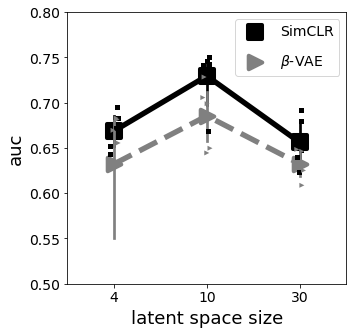

In [106]:
def plotting_SimCLR_betaVAE_1(bdd, ax, label_axes=True):
    ax.xaxis.set_tick_params(labelsize = 14)
    ax.yaxis.set_tick_params(labelsize = 14)
    sns.pointplot(\
        data=bdd,
        x=bdd["latent space size"],
        y="auc",
        hue = "model",
        palette=['black', 'grey'],
        markers=['s', '>'], 
        scale=2, linestyles=['-', '--'], ax=ax)
    sns.stripplot(\
        data=bdd[bdd.model=="SimCLR"], 
        x=bdd["latent space size"], 
        y="auc",
        hue = "model", marker='s', palette=['black'], jitter=.05, ax=ax)
    sns.stripplot(\
        data=bdd[bdd.model=="beta-VAE"], 
        x=bdd["latent space size"], 
        y="auc",
        hue = "model", marker='>', palette=['grey'], jitter=.05, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1]], ["SimCLR", r"$\beta$-VAE"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)

plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_SimCLR_betaVAE_1(bdd=res_bdd, ax=ax)

plt.show()

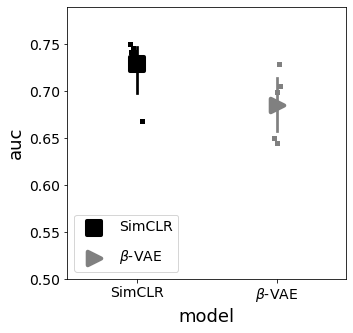

In [107]:
def plotting_SimCLR_betaVAE(bdd, ax, label_axes=True):
    ax.xaxis.set_tick_params(labelsize = 14)
    ax.yaxis.set_tick_params(labelsize = 14)
    bdd = bdd.copy(deep=True)
    bdd.loc[bdd["model"]=="beta-VAE", "model"] = r"$\beta$-VAE"
    sns.pointplot(\
        data=bdd,
        x=bdd["model"],
        y="auc",
        hue = "model",
        palette=['black', 'grey'],
        markers=['s', '>'], 
        scale=2, linestyles=['-', '--'], ax=ax)
    sns.stripplot(\
        data=bdd, 
        x=bdd["model"], 
        y="auc",
        hue = "model", marker='s', palette=['black', 'grey'], jitter=.05, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1]], ["SimCLR", r"$\beta$-VAE"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.79])
    if not label_axes:
        ax.set(ylabel=None)

plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_SimCLR_betaVAE(bdd=res_bdd[res_bdd["latent space size"] == 10], ax=ax)

plt.show()

In [108]:
res_bdd.columns

Index(['auc', 'latent space size', 'model'], dtype='object')

In [109]:
def plotting_against_site(bdd, ax, label_axes=True):
    ax.set_title("n = 171", fontsize=18)
    sns.pointplot(data=bdd, x=bdd["training set"], y="auc", hue="training set", palette=['black', 'grey'], markers=['s', 'o'], linestyles=['-', '-'], scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["training set"], y="auc", marker='s', palette=['black', 'grey'], jitter=.05, ax=ax)
    ax.legend([],[], frameon=False)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)

# plt.rc('xtick', labelsize=14) 
# plt.rc('ytick', labelsize=14) 
# plt.rc('axes', labelsize=18) 
# f, ax = plt.subplots(1, 1, figsize=(5, 5))

# plotting_against_site(bdd=res_bdd, ax=ax)

## Use the different-n database

In [110]:
database_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv"

In [111]:
bdd_n_site = import_bdd(database_path, verbose=True)
bdd_n_site.sort_values(by='auc', inplace=True)
print(bdd_n_site[bdd_n_site.model_path.str.contains("training-on-hcp-2-n=551")])
bdd_n_site = bdd_n_site[bdd_n_site.exclude == 'False']

bdd_n_site["model_name"] = bdd_n_site.model_path.apply(lambda x: x.split(sep='/')[-2])
print(bdd_n_site[bdd_n_site["model_name"]=="training-on-hcp-2-n=551"])
bdd_n_site.head()

path /neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv
0 have been removed for bad learning
                                           model_path       auc   auc_std  \
29  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.668262  0.002930   
26  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741189  0.002659   
25  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741980  0.003783   
27  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.745901  0.003135   
28  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.749881  0.003085   

    accuracy  accuracy_std          dataset_name   model  n_max  with_labels  \
29  0.662199      0.008900  cingulate_HCP_half_2  SimCLR   1080        False   
26  0.691532      0.006607  cingulate_HCP_half_2  SimCLR   1080        False   
25  0.690924      0.008623  cingulate_HCP_half_2  SimCLR   1080        False   
27  0.699181      0.006776  cingulate_HC

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20
32,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.570375,0.015530,0.588257,0.012994,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=64
23,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.596417,0.045014,0.584515,0.010981,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=32
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.616425,0.007069,0.616936,0.010266,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=32
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171


In [112]:
bdd_n_site[bdd_n_site.model_name=='training-on-hcp-2-n=551']

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.668262,0.002930,0.662199,0.008900,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
26,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
25,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
27,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
28,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551


In [113]:
bdd_n = bdd_n_site[(bdd_n_site["dataset_name"] != "cingulate_ACCpatterns_0")].copy(deep=True)
print(bdd_n[bdd_n.model_name=='training-on-hcp-2-n=551'])
bdd_n["n"] = bdd_n.model_name.apply(lambda x: int(float(x.split(sep='=')[-1])))
bdd_n = bdd_n[bdd_n["n"]<=551]
bdd_n['id'] = True
bdd_n[bdd_n.model_name=='training-on-hcp-2-n=551']

                                           model_path       auc   auc_std  \
29  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.668262  0.002930   
26  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741189  0.002659   
25  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741980  0.003783   
27  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.745901  0.003135   
28  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.749881  0.003085   

    accuracy  accuracy_std          dataset_name   model  n_max  with_labels  \
29  0.662199      0.008900  cingulate_HCP_half_2  SimCLR   1080        False   
26  0.691532      0.006607  cingulate_HCP_half_2  SimCLR   1080        False   
25  0.690924      0.008623  cingulate_HCP_half_2  SimCLR   1080        False   
27  0.699181      0.006776  cingulate_HCP_half_2  SimCLR   1080        False   
28  0.699977      0.010915  cingulate_HCP_half_2  SimCLR   1080        False   

   train_val_csv_file exclude               model_name  

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n,id
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.668262,0.002930,0.662199,0.008900,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
26,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
25,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
27,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
28,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True


In [114]:
bdd_n[bdd_n.model_name=="training-on-hcp-2-n=551"]

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n,id
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.668262,0.002930,0.662199,0.008900,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
26,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
25,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
27,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
28,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True


(0.5, 0.8)

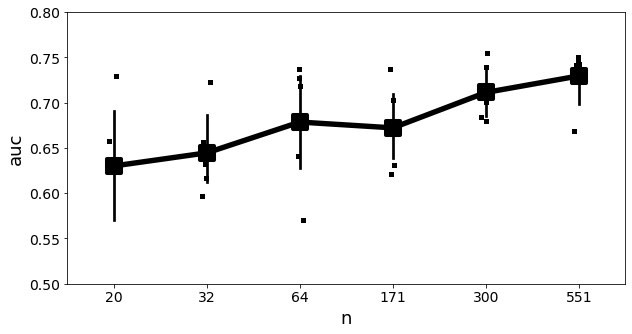

In [115]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd_n, x=bdd_n.n, y="auc", palette=['black'], hue='id', markers='s', linestyles=['-'], scale=2,ax=axs)
sns.stripplot(data=bdd_n, x=bdd_n.n, y="auc", marker='s', palette=['black'], jitter=.05, ax=axs)
axs.legend([],[], frameon=False)
axs.set_ylim([0.5,0.8])

In [116]:
bdd_n2 = bdd_n_site.copy(deep=True)
bdd_n2["n"] = bdd_n2.model_name.apply(lambda x: int((x.split(sep='=')[-1])))
bdd_n2 = bdd_n2[bdd_n2["n"]<=551]
bdd_n2.head()

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
32,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.570375,0.015530,0.588257,0.012994,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=64,64
23,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.596417,0.045014,0.584515,0.010981,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=32,32
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.616425,0.007069,0.616936,0.010266,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=32,32
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,171


In [117]:
bdd_n2[bdd_n2.n == 20]

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
14,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.633726,0.004560,0.588608,0.010724,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
13,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.634763,0.002100,0.592327,0.007372,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
11,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.657107,0.005040,0.662830,0.007252,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
10,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.728256,0.004685,0.707579,0.012732,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=20,20


In [118]:
bdd_n2.rename(columns={"n": "training set size"}, inplace=True)

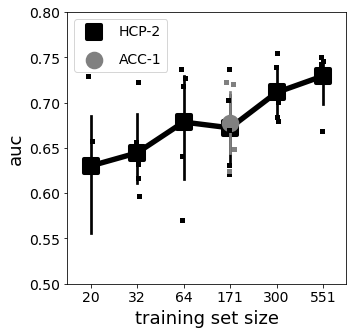

In [119]:
def plotting_against_n(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["training set size"], y="auc", palette=['black', 'grey'], hue='dataset_name', markers=['s', 'o'], linestyles=['-', '--'], scale=2,ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_HCP_half_2"], x=bdd["training set size"], y="auc", marker='s', palette=['black'], jitter=.05, ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_ACCpatterns_0"], x=bdd["training set size"], y="auc", marker='s', palette=['grey'], jitter=.1, ax=ax)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1]], ["HCP-2", "ACC-1"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set_ylabel("")
        ax.set_yticks([])

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_n(bdd=bdd_n2, ax=ax)

In [120]:
bdd_n2[bdd_n2.dataset_name=="cingulate_ACCpatterns_0"].auc

0    0.624013
4    0.648125
2    0.676315
1    0.719590
3    0.721941
Name: auc, dtype: float64

In [121]:
bdd_n2[(bdd_n2.dataset_name=="cingulate_HCP_half_2") & (bdd_n2["training set size"]==171)].auc

6    0.620586
7    0.631104
8    0.669738
9    0.702277
5    0.736871
Name: auc, dtype: float64

In [122]:
from scipy import stats
stats.ttest_ind(bdd_n2[bdd_n2.dataset_name=="cingulate_ACCpatterns_0"].auc, bdd_n2[(bdd_n2.dataset_name=="cingulate_HCP_half_2") & (bdd_n2["training set size"]==171)].auc)

Ttest_indResult(statistic=0.20224396343788223, pvalue=0.8447744593177072)

In [123]:
bdd_n2.model_name[:7]

12     training-on-hcp-2-n=20
32     training-on-hcp-2-n=64
23     training-on-hcp-2-n=32
20     training-on-hcp-2-n=32
6     training-on-hcp-2-n=171
0            convnet-10-n=171
7     training-on-hcp-2-n=171
Name: model_name, dtype: object

## different-n including UKBioBank

In [124]:
database_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_HCP-UkBioBank_different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.loc[bdd.dataset_name.str.contains("UkBioBank"), "dataset_name"] = "UKBioBank"
bdd.loc[bdd.dataset_name.str.contains("ACCpatterns"), "dataset_name"] = "ACC-1"
bdd.loc[bdd.dataset_name.str.contains("HCP"), "dataset_name"] = "HCP"

In [125]:
def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:])

In [126]:
bdd = bdd.copy()
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd.loc[bdd.dataset_name=="ACC","model_name"] = "cingulate_ACCpatterns_0_n=171"
bdd.loc[bdd.model_name=="all","model_name"] = "cingulate_HCP_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1101"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd[["auc", "nb_subjects", "n", "dataset_name", "model_name", "short_model_path"]][bdd.short_model_path.str.contains("1101")].sort_values(by='n')

,auc,nb_subjects,n,dataset_name,model_name,short_model_path
27,0.772855,-1,1101,HCP,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_0
28,0.767657,-1,1101,HCP,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_2
47,0.765963,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-51-46_0
29,0.759345,-1,1101,HCP,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_3
48,0.754996,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-51-46_1
51,0.752281,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_0
50,0.749047,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_2
25,0.746703,-1,1101,HCP,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_1
26,0.738183,-1,1101,HCP,cingulate_UkBioBank_n=1101,training-on-whole-hcp-n=1101/22-49-11_4
49,0.732928,1101,1101,UKBioBank,cingulate_UkBioBank_n=1101,ukbiobank-n=1101/18-49-19_1


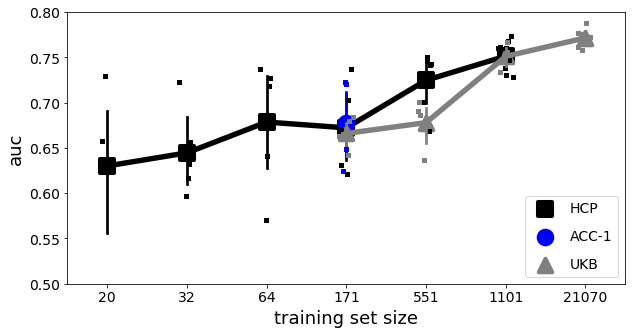

In [127]:
def plotting_HCP_UKB_against_n(bdd, ax, label_axes=True):
    bdd = bdd[(bdd.n != 300)]
    sns.pointplot(data=bdd, x=bdd.n, y="auc", palette=['black', 'blue', 'grey'],markers=['s', 'o','^'], hue='dataset_name', hue_order=["HCP", "ACC-1", "UKBioBank"], linestyles=['-','-','-'], scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=['black', 'blue', 'grey'], hue='dataset_name', hue_order=["HCP", "ACC-1", "UKBioBank"], jitter=1, ax=ax)
    ax.legend([],[], frameon=False)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1], handles[2]], ["HCP", "ACC-1", "UKB"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.8])
    # plt.setp(ax.collections, alpha=.8)
    ax.set_xlabel("training set size")
    if not label_axes:
        ax.set_ylabel("")
        ax.set_yticks([])

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 

f, ax = plt.subplots(1, 1, figsize=(10, 5))

plotting_HCP_UKB_against_n(bdd=bdd, ax=ax)


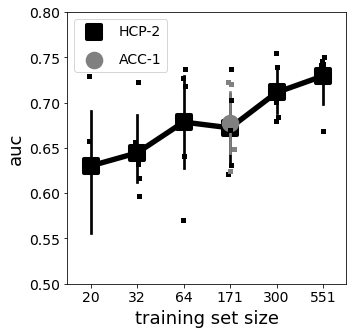

In [128]:
def plotting_against_n(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["training set size"], y="auc", palette=['black', 'grey'], hue='dataset_name', markers=['s', 'o'], linestyles=['-', '--'], scale=2,ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_HCP_half_2"], x=bdd["training set size"], y="auc", marker='s', palette=['black'], jitter=.05, ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_ACCpatterns_0"], x=bdd["training set size"], y="auc", marker='s', palette=['grey'], jitter=.1, ax=ax)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1]], ["HCP-2", "ACC-1"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set_ylabel("")
        ax.set_yticks([])

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_n(bdd=bdd_n2, ax=ax)

## Site effect

In [129]:
bdd_site = bdd_n_site[(bdd_n_site.model_name == "training-on-hcp-2-n=171") | (bdd_n_site.model_name == "convnet-10-n=171")].copy(deep=True)

In [130]:
bdd_site["training_set"] = bdd_site.model_name.apply(lambda x: "HCP-2" if x=="training-on-hcp-2-n=171" else "ACC-1")
bdd_site

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,training_set
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.624013,0.007769,0.614363,0.013166,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
7,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.631104,0.008945,0.637123,0.014007,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
4,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.648125,0.007328,0.617287,0.015699,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
8,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.669738,0.007033,0.636632,0.007465,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.676315,0.004879,0.658713,0.008576,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
9,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.702277,0.003577,0.643345,0.009537,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.719590,0.003066,0.658526,0.008749,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.721941,0.003999,0.680070,0.005891,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
5,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.736871,0.003264,0.680865,0.009438,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2


In [131]:
bdd_site.rename(columns={"training_set": "training set"}, inplace=True)

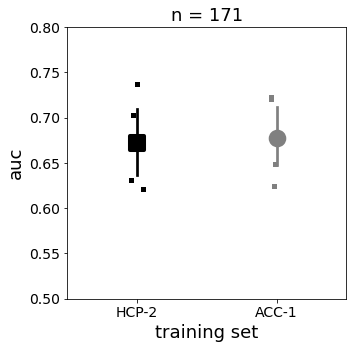

In [132]:
def plotting_against_site(bdd, ax, label_axes=True):
    ax.set_title("n = 171", fontsize=18)
    sns.pointplot(data=bdd, x=bdd["training set"], y="auc", hue="training set", palette=['black', 'grey'], markers=['s', 'o'], linestyles=['-', '-'], scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["training set"], y="auc", marker='s', palette=['black', 'grey'], jitter=.05, ax=ax)
    ax.legend([],[], frameon=False)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_site(bdd=bdd_site, ax=ax)

## Variation with batch size

In [133]:
batch_bdd = pd.read_csv("/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_batch-size_training-HCP-half-2_evaluation-ACCpatterns-1.csv")

In [134]:
batch_bdd.rename(columns={"batch_size": "batch size"}, inplace=True)

In [135]:
batch_bdd.head()

,batch size,path,auc,auc_std,accuracy,accuracy_std
0,16,16_2,0.745901,0.003135,0.699181,0.006776
1,4,17-42-14_4,0.630264,0.006329,0.626246,0.012982
2,4,17-42-14_3,0.670654,0.008074,0.654292,0.008544
3,64,23-59-54_2,0.738462,0.003204,0.712070,0.007993
4,2,15-54-55_2,0.479448,0.045682,0.564889,0.016408


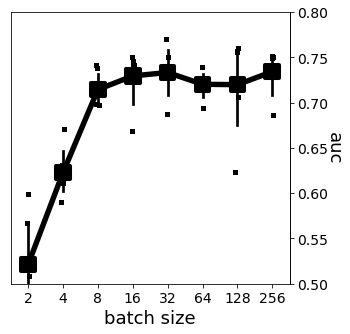

In [136]:
def plotting_against_batch_size(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["batch size"], markers='s', color='black', y="auc", scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["batch size"], y="auc", marker='s', color='black', jitter=.05, ax=ax)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)
    ax.set_ylabel("")
    ax.set_yticks([])
    secax = ax.secondary_yaxis('right')
    secax.set_ylabel('auc', rotation=270, labelpad=15)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))
plotting_against_batch_size(bdd=batch_bdd, ax=ax)

## Summary

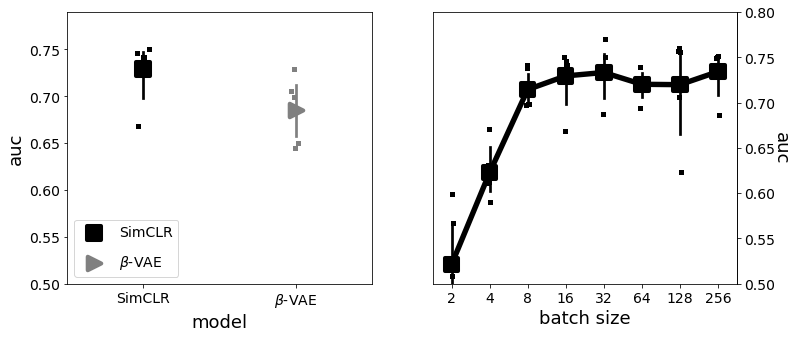

In [137]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1,2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1]})

plotting_SimCLR_betaVAE(bdd=res_bdd[res_bdd["latent space size"] == 10], ax=axs[0])
# plotting_against_site(bdd=bdd_site, ax=axs[2], label_axes=False)
plotting_against_batch_size(bdd=batch_bdd, ax=axs[1], label_axes=False)
# plotting_HCP_UKB_against_n(bdd=bdd, ax=axs[1,0], label_axes=False)

In [138]:
f.savefig(save_fig_path + "/testing_HCP.png")

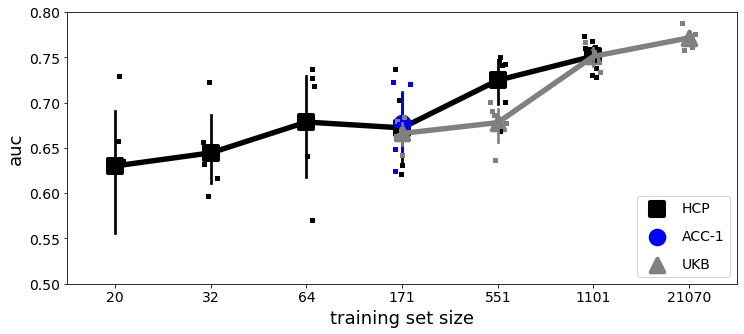

In [139]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1,1, figsize=(12, 5))
plotting_HCP_UKB_against_n(bdd=bdd, ax=axs, label_axes=True)

In [140]:
f.savefig(save_fig_path + "/testing_n.png")